## Evaluation Metrics of Logistic Regression

In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import SCORERS, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, fbeta_score, roc_curve, roc_auc_score
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Aquire Data

In [2]:
bunch_object = datasets.fetch_openml(name="heart-disease", version=1)
bunch_object.keys()

C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
df = pd.DataFrame(data=bunch_object.data, columns=bunch_object.feature_names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### EDA

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

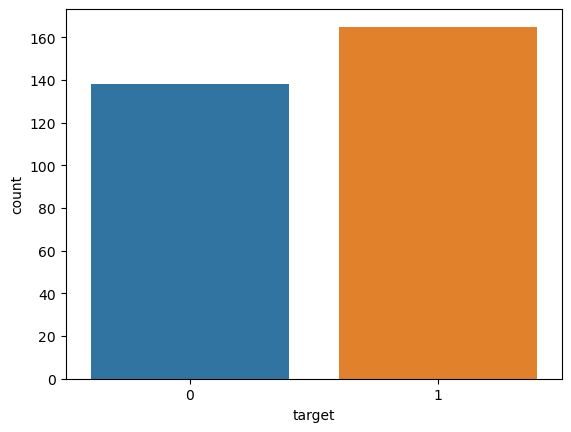

In [9]:
sns.countplot(df, x='target')

<Axes: xlabel='cp', ylabel='count'>

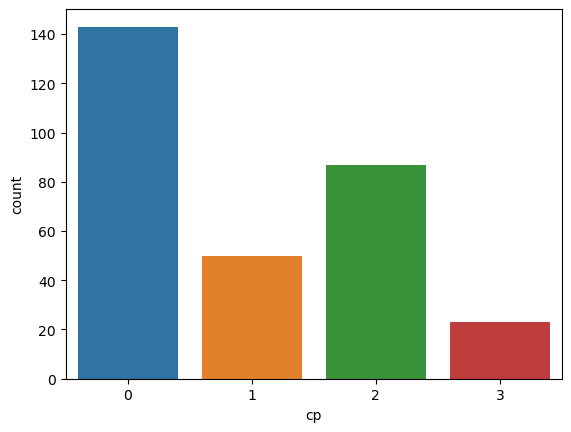

In [10]:
sns.countplot(df, x='cp')

<Axes: xlabel='age', ylabel='Count'>

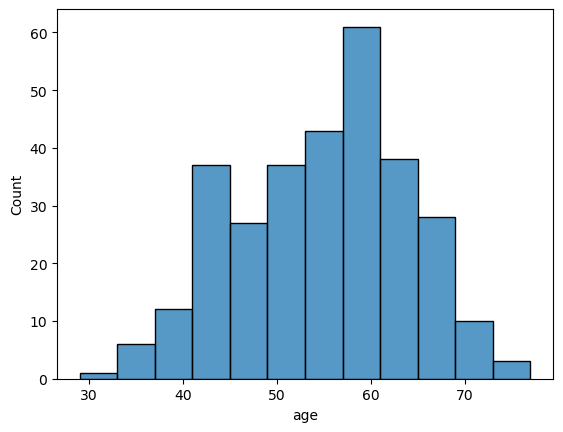

In [11]:
sns.histplot(df, x='age')

<Axes: xlabel='chol', ylabel='Count'>

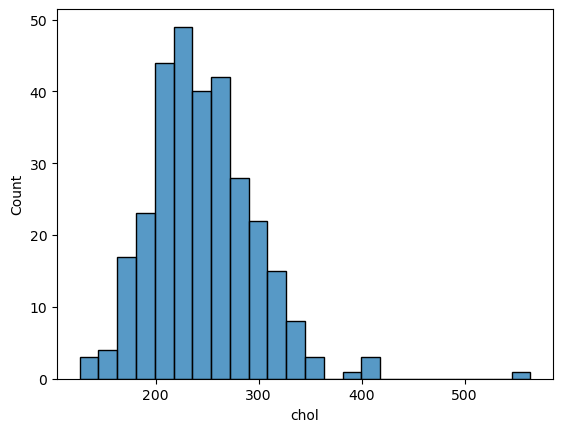

In [12]:
sns.histplot(df, x='chol')

<Axes: xlabel='chol'>

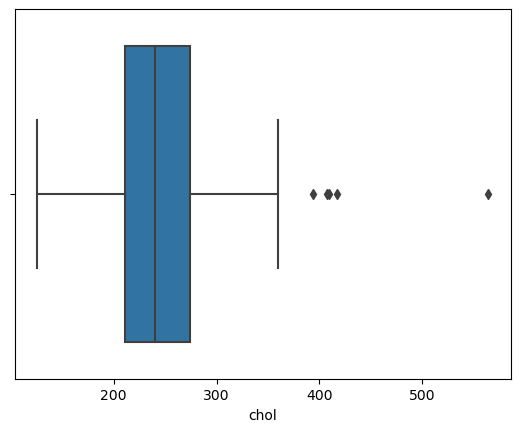

In [14]:
sns.boxplot(df, x='chol')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: xlabel='age', ylabel='thalach'>

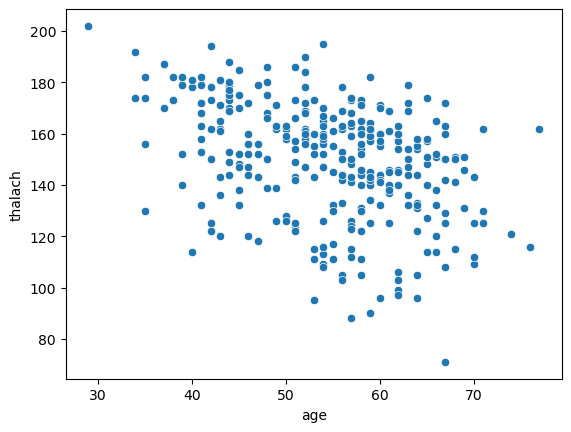

In [16]:
sns.scatterplot(df, x='age', y='thalach')

<Axes: xlabel='age', ylabel='thalach'>

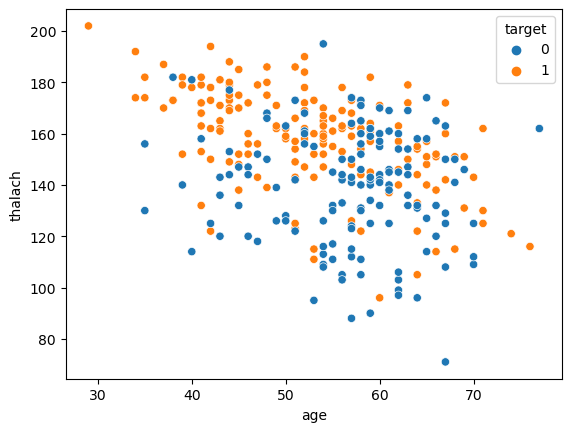

In [17]:
sns.scatterplot(df, x='age', y='thalach', hue='target')

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

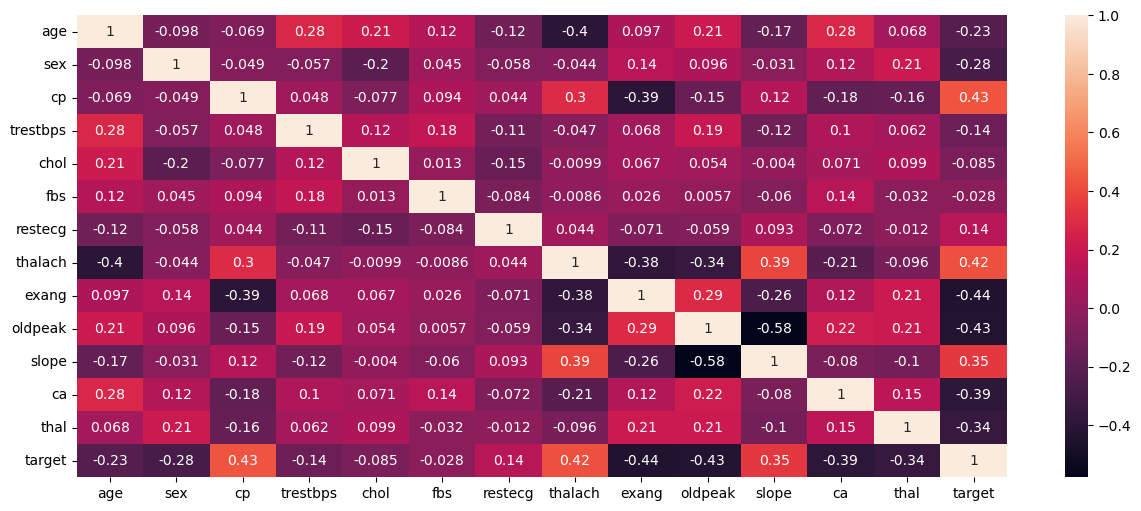

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Model Training

In [4]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
len(X_train), len(X_test)

(242, 61)

In [6]:
scalar = StandardScaler()
scalar.fit(X_train)
scaled_X_train = scalar.transform(X_train)
scaled_X_test = scalar.transform(X_test)

In [7]:
scaled_X_train

array([[-1.33467373,  0.67015058, -0.95458269, ...,  1.04349839,
        -0.70898265, -0.48150478],
       [ 0.69176014, -1.49220195, -0.95458269, ..., -0.59628479,
        -0.70898265,  1.11471655],
       [ 0.80433979, -1.49220195, -0.95458269, ...,  1.04349839,
        -0.70898265, -0.48150478],
       ...,
       [ 0.69176014,  0.67015058,  0.93893379, ..., -0.59628479,
        -0.70898265, -0.48150478],
       [ 0.69176014,  0.67015058,  1.88569204, ..., -0.59628479,
         1.26313001, -0.48150478],
       [ 0.2414415 ,  0.67015058,  0.93893379, ...,  1.04349839,
         0.27707368,  1.11471655]])

In [8]:
scaled_X_test[1].mean()

0.39338972249858484

In [9]:
scaled_X_test[1].std()

0.9445553468739959

In [10]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [11]:
model.coef_

array([[-0.03949332, -0.75234087,  0.75877113, -0.32921334, -0.10390296,
         0.03871837,  0.30406442,  0.63910927, -0.29446201, -0.63868314,
         0.22677787, -0.73164988, -0.52449106]])

In [12]:
model.intercept_

array([0.17833406])

In [13]:
probs = model.predict_proba(scaled_X_test)
probs

array([[0.00815874, 0.99184126],
       [0.11904725, 0.88095275],
       [0.02394178, 0.97605822],
       [0.74461485, 0.25538515],
       [0.68620514, 0.31379486],
       [0.9626643 , 0.0373357 ],
       [0.33800871, 0.66199129],
       [0.03318872, 0.96681128],
       [0.68017285, 0.31982715],
       [0.07128913, 0.92871087],
       [0.1785114 , 0.8214886 ],
       [0.9907996 , 0.0092004 ],
       [0.9103587 , 0.0896413 ],
       [0.25066682, 0.74933318],
       [0.04469425, 0.95530575],
       [0.48843381, 0.51156619],
       [0.11135776, 0.88864224],
       [0.30970563, 0.69029437],
       [0.66644289, 0.33355711],
       [0.99622629, 0.00377371],
       [0.00864235, 0.99135765],
       [0.9794142 , 0.0205858 ],
       [0.41305354, 0.58694646],
       [0.92827737, 0.07172263],
       [0.98612426, 0.01387574],
       [0.26777933, 0.73222067],
       [0.99233132, 0.00766868],
       [0.1145202 , 0.8854798 ],
       [0.35361946, 0.64638054],
       [0.99413058, 0.00586942],
       [0.

In [15]:
y_prob = probs[:,1]
y_prob

array([0.99184126, 0.88095275, 0.97605822, 0.25538515, 0.31379486,
       0.0373357 , 0.66199129, 0.96681128, 0.31982715, 0.92871087,
       0.8214886 , 0.0092004 , 0.0896413 , 0.74933318, 0.95530575,
       0.51156619, 0.88864224, 0.69029437, 0.33355711, 0.00377371,
       0.99135765, 0.0205858 , 0.58694646, 0.07172263, 0.01387574,
       0.73222067, 0.00766868, 0.8854798 , 0.64638054, 0.00586942,
       0.53079837, 0.94461409, 0.97144974, 0.99689867, 0.87154038,
       0.97651181, 0.54186077, 0.00691448, 0.92193046, 0.91501052,
       0.99127229, 0.9574321 , 0.05350028, 0.18595097, 0.78369623,
       0.07246424, 0.91333947, 0.69453775, 0.49362162, 0.29029273,
       0.31840982, 0.04016536, 0.71184106, 0.01078019, 0.77571284,
       0.95203588, 0.87210665, 0.62531545, 0.64639495, 0.93483498,
       0.99352217])

In [17]:
output = np.array([1.0 if p>=0.5 else 0.0 for p in y_prob])
output

array([1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
y_pred = model.predict(scaled_X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Evaluation 

In [20]:
y_test.values

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

## Confusion Matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[21,  8],
       [ 1, 31]], dtype=int64)

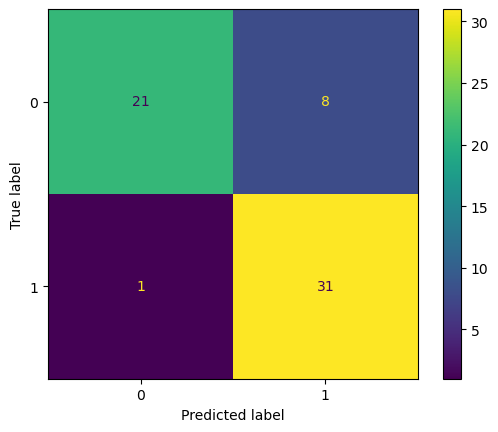

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

### 1) Accuraccy

In [27]:
tn, fp, fn, tp = np.reshape((confusion_matrix(y_test, y_pred)), -1)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print("Accuracy", accuracy)

Accuracy 0.8524590163934426


In [28]:
accuracy_score(y_test, y_pred)

0.8524590163934426

### 2) Precision

In [29]:
precision_score(y_test, y_pred)

0.7948717948717948

In [30]:
prec = tp/(tp+fp)
prec

0.7948717948717948

### 3) Recall

In [31]:
recall = tp/(tp+fn)
recall

0.96875

In [32]:
recall_score(y_test, y_pred)

0.96875

### 4) F1- Score

In [33]:
f1 = (2*prec*recall)/(prec+recall)
f1

0.8732394366197183

In [34]:
f1_score(y_test, y_pred)

0.8732394366197183

### Classification Report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        29
           1       0.79      0.97      0.87        32

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [39]:
print("Fbeta 1:", fbeta_score(y_test, y_pred, beta=1))
print("Fbeta 0.5:", fbeta_score(y_test, y_pred, beta=0.5))
print("Fbeta 10:", fbeta_score(y_test, y_pred, beta=10))

Fbeta 1: 0.8732394366197183
Fbeta 0.5: 0.8244680851063829
Fbeta 10: 0.9666563754245135


### Precision - Recall Trade off

### CM with threshold 0.5

In [44]:
print("Precision: ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))

Precision:  0.7948717948717948
Recall :  0.96875


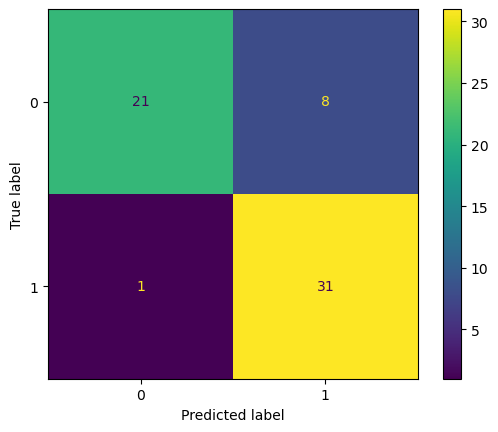

In [42]:
disp.plot()

### CM with threshold 0.9

In [45]:
print("Precision: ",precision_score(y_test, y_pred2))
print("Recall : ",recall_score(y_test, y_pred2))

Precision:  0.8888888888888888
Recall :  0.5


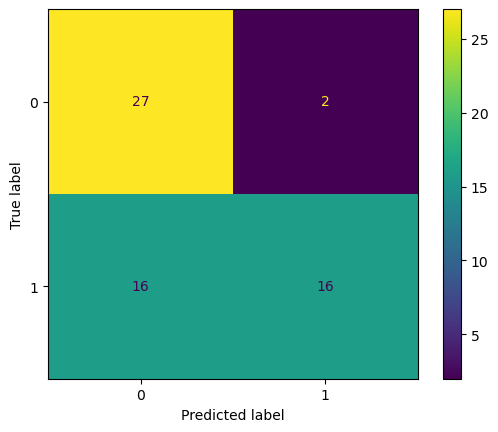

In [41]:
y_pred2 = [1.0 if p>=0.9 else 0.0 for p in y_prob]
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))
disp2.plot()

### CM with threshold 0.2

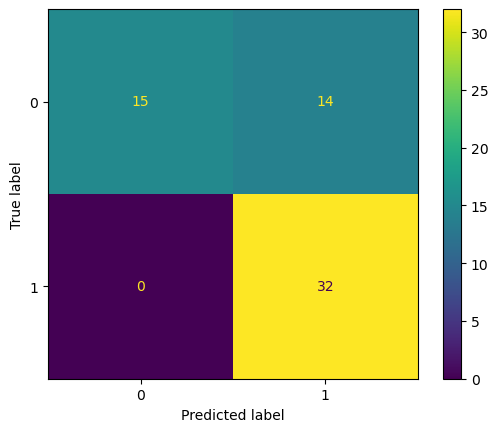

In [47]:
y_pred3 = [1.0 if p>=0.2 else 0.0 for p in y_prob]
disp3 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred3))
disp3.plot()

In [48]:
print("Precision: ",precision_score(y_test, y_pred3))
print("Recall : ",recall_score(y_test, y_pred3))

Precision:  0.6956521739130435
Recall :  1.0


### ROC Curve and AUC score

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
pd.DataFrame(zip(fpr, tpr, thresholds), columns=["FPR", "TPR", "Threshold"])

,FPR,TPR,Threshold
0,0.000000,0.00000,1.996899
1,0.000000,0.03125,0.996899
2,0.000000,0.46875,0.928711
3,0.034483,0.46875,0.921930
4,0.034483,0.50000,0.915011
5,0.068966,0.50000,0.913339
6,0.068966,0.84375,0.711841
7,0.103448,0.84375,0.694538
8,0.103448,0.87500,0.690294
9,0.206897,0.87500,0.646381


In [51]:
auc = roc_auc_score(y_test, y_prob)
print("AUC Score :", auc)

AUC Score : 0.9418103448275862


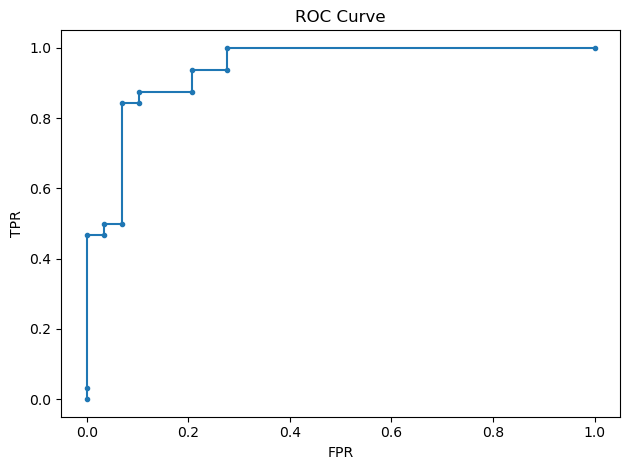

In [52]:
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()